# CSCI7000 - Mathematical & Computational Modeling of Infectious Diseases
## Homework 2
- Author: Corey Lynn Murphey
- Instructor: Prof. Dan Larremore
- Deadline: 26 February 2023

Please note that discussion-based problems are not included in this notebook. You can find those responses in the homework PDF. 

## Libraries Imported

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from IPython.display import display, Markdown

## Problem 1



### 1.a
Using your Forward Euler method, simulate the solution to the normalized SIS model discussed in class (Week 3) using $\beta=3$ and $\gamma=2$, and with $\left(s_{0}, i_{0}\right)=(0.99,0.01)$. Create three plots ranging from $t=0$ to $t=25$. On the first, simulate using a step size $\Delta t=2$. On the second, use $\Delta t=1$. On the third, use $\Delta t=\frac{1}{2}$. In each plot, show only your solution's $I(t)$ in a red solid line, labeled as "Forward Euler", and then also plot the analytical solution from class in a black dashed line, labeled as "Analytical." Please also set the y-axis range to $[0,0.5]$.

In [2]:
# forward Euler step
def step(deltat, y_old, t_old, dydt):
    y_new = deltat*dydt + y_old # new y value
    t_new = t_old + deltat # new t value
    return y_new, t_new

# not generalized. Specifically a forward Euler solver 
#     for our SIS equation
def forwardEulerSIS(IC, ts, coeffs):
    beta, gamma = coeffs
    s0, i0 = IC
    
    # initialize
    n = ts.size # number of time steps
    s = np.zeros(n)
    i = np.zeros(n)

    # initial conditions
    s[0] = s0
    i[0] = i0

    # loop, forwardEuler
    for j in range(n-1): 
        # compute the derivative at the last time step
        sp, ip = sis_Deriv(s[j], i[j], beta, gamma)
        
        # compute next step forward
        s[j+1], t_new = step(dt, s[j], ts[j], sp)
        i[j+1], t_new = step(dt, i[j], ts[j], ip)
        
    return s, i, ts

# function that returns the derivative for \dot{s}, \dot{i}
# normalized SIS model
def sis_Deriv(s, i, beta, gamma):
    sp = -beta*s*i + gamma*i
    ip = beta*s*i - gamma*i
    return sp, ip

In [3]:
def analyticSoln(R_0, gamma, beta, i_0, ts):
    i_an = (1 - 1/R_0)/(1 + ((1 - 1/R_0 - i_0)/i_0)
                        * np.exp(-(beta - gamma)*ts))
    return i_an


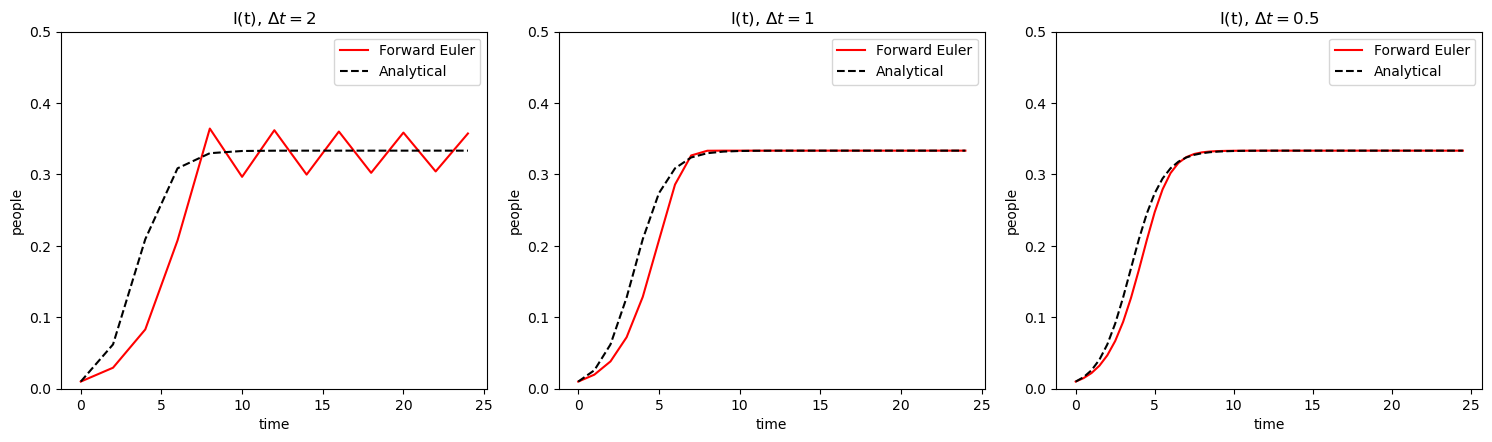

In [4]:
# parameters
i_0 = .01 #initial infection
s_0 = .99 # initial susceptible

dts = [2, 1, 0.5] # time step
t_max = 25 # maximum time

# coefficients, as arrays so we can loop over values
beta = 3
gamma = 2

R_0 = beta/gamma

IC = [s_0, i_0] #initial conditions

#initialize the plotting
fig, ax = plt.subplots(1,3, figsize = (15,4.5))

# loop over the beta and gamma coefficient values
for x in range(3):
    dt = dts[x]
    coeffs = [beta, gamma]
    # define ts from 0 - t_max with dt time step. 
    ts = np.arange(0, t_max, dt)  # create the time array between 0 - t_max

    # solve the SIR system of eqns with our forward Euler function above
    s, i, t = forwardEulerSIS(IC, ts, coeffs)

    # analytical solution:
    i_an = analyticSoln(R_0, gamma, beta, i_0, ts)

    # plot 
    ax[x].plot( t, i, 'r', label='Forward Euler') # plot the forward euler solution
    ax[x].plot(ts, i_an, 'k--', label='Analytical') # plot the analytical solution
    ax[x].legend(loc='upper right')
    ax[x].set_xlabel('time')
    ax[x].set_ylabel('people')
    ax[x].set_ylim([0,0.5])
    ax[x].set_title(r'I(t), $\Delta t = {}$'.format(dt))

#pad the figure
fig.tight_layout(pad=1.0)
#save the figure
plt.savefig('my_sis.png')

### 1.c

c. Define the maximum absolute error for a simulation using a particular $\Delta t$ as

$$
E(\Delta t) =\max _{t}\left | I_{\text {Euler}, \Delta t}(t)-I_{\text {analytical}}(t)\right | .
$$

Write a function that runs the appropriate simulation, computes the analytical solution, and returns $E$ without plotting. Share a link to your code for this problem.


In [5]:
def maxError(dt, t_max, coeffs, IC):
    s_0, i_0 = IC
    beta, gamma, R_0 = coeffs

    # compute ts
    ts = np.arange(0, t_max, dt)  # create the time array between 0 - t_max

    # Compute numerical Solution
    s, i, t = forwardEulerSIS(IC, ts, [beta,gamma])
    # Compute analytical Solution
    i_an = analyticSoln(R_0, gamma, beta, i_0, ts)

    error = np.amax(np.absolute(i - i_an))
    return error

In [6]:
# parameters
i_0 = .01  # initial infection
s_0 = .99  # initial susceptible
IC = [s_0, i_0]  # initial conditions

dts = [2, 1, 0.5]  # time step
t_max = 25  # maximum time

# coefficients, as arrays so we can loop over values
beta = 3
gamma = 2
R_0 = beta/gamma

coeffs = [beta, gamma, R_0]

# loop over the beta and gamma coefficient values
for x in range(3):
    dt = dts[x]
    
    # compute the error
    error = maxError(dt, t_max, coeffs, IC)

    display(Markdown(rf'Max Absolute Error for $\Delta t = {dt}$ is : {error}'))


Max Absolute Error for $\Delta t = 2$ is : 0.1263393498870075

Max Absolute Error for $\Delta t = 1$ is : 0.08077107437456943

Max Absolute Error for $\Delta t = 0.5$ is : 0.04283504637204699

### 1.d

d. Create a plot on $\log -\log$ axes showing $E(\Delta t)$ vs $\Delta t$ for values

$$
\Delta t \in\left\{2,1, \frac{1}{2}, \frac{1}{4}, \frac{1}{8}, \frac{1}{16}, \frac{1}{32}\right\}
$$

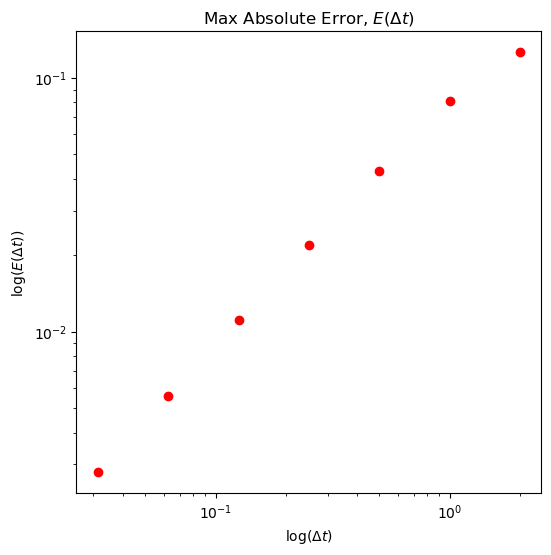

In [7]:
i_0 = .01  # initial infection
s_0 = .99  # initial susceptible
IC = [s_0, i_0]  # initial conditions

dts = [2, 1, 1/2, 1/4, 1/8, 1/16, 1/32]  # time step
t_max = 25  # maximum time

# coefficients, as arrays so we can loop over values
beta = 3
gamma = 2
R_0 = beta/gamma

coeffs = [beta, gamma, R_0]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

for x in range(7):
    dt = dts[x]

    error = maxError(dt, t_max, coeffs, IC)

    # plot 
    ax.loglog( dt, error, 'ro', label=r'$\Delta t$ = {}'.format(dt)) # plot the max absolute error on log-log axes

# ax.legend(loc='lower right')
ax.set_xlabel(r'$\log(\Delta t)$')
ax.set_ylabel(r'$\log(E(\Delta t))$')
ax.set_title(r'Max Absolute Error, $E(\Delta t)$')
plt.savefig('error.png')


## Problem 2


In [8]:

# function that returns the derivative for \dot{s}, \dot{i}
# normalized leaky model

def leaky_Deriv(s, i, r, v, beta, gamma, VE):
    sp = -beta * s * i
    ip = beta * s * i + beta * v * i * (1 - VE) - gamma * i
    rp = gamma * i
    vp = -beta * v * i * (1 - VE)
    return sp, ip, rp, vp

# function that returns the derivative for \dot{s}, \dot{i}
# normalized ANM model
def anm_Deriv(s, i, r, v_no, v_all, beta, gamma):
    sp = -beta * s * i
    ip = beta * s * i + beta * v_no * i - gamma * i
    rp = gamma * i
    v_no_p = -beta * v_no * i 
    v_all_p = 0 
    
    return sp, ip, rp, v_no_p, v_all_p

In [9]:
# not generalized. Specifically a forward Euler solver
#     for our SIS equation
def forwardEulerLeaky(IC, ts, coeffs):
    beta, gamma, VE = coeffs
    s0, i0, r0, v0 = IC

    # initialize
    n = ts.size  # number of time steps
    s = np.zeros(n)
    i = np.zeros(n)
    r = np.zeros(n)
    v = np.zeros(n)

    # initial conditions
    s[0] = s0
    i[0] = i0
    r[0] = r0
    v[0] = v0

    # loop, forwardEuler
    for j in range(n-1):
        # compute the derivative at the last time step
        sp, ip, rp, vp = leaky_Deriv(s[j], i[j], r[j], v[j], beta, gamma, VE)

        # compute next step forward
        s[j+1], t_new = step(dt, s[j], ts[j], sp)
        i[j+1], t_new = step(dt, i[j], ts[j], ip)
        r[j+1], t_new = step(dt, r[j], ts[j], rp)
        v[j+1], t_new = step(dt, v[j], ts[j], vp)

    return s, i, r, v, ts


def forwardEulerANM(IC, ts, coeffs):
    beta, gamma = coeffs
    s0, i0, r0, v_no_0, v_all_0 = IC

    # initialize
    n = ts.size  # number of time steps
    s = np.zeros(n)
    i = np.zeros(n)
    r = np.zeros(n)
    v_no = np.zeros(n)
    v_all = np.zeros(n)

    # initial conditions
    s[0] = s0
    i[0] = i0
    r[0] = r0
    v_no[0] = v_no_0
    v_all[0] = v_all_0

    # loop, forwardEuler
    for j in range(n-1):
        # compute the derivative at the last time step
        sp, ip, rp, v_no_p, v_all_p = anm_Deriv(s[j], i[j], r[j], v_no[j], v_all[j], beta, gamma)

        # compute next step forward
        s[j+1], t_new = step(dt, s[j], ts[j], sp)
        i[j+1], t_new = step(dt, i[j], ts[j], ip)
        r[j+1], t_new = step(dt, r[j], ts[j], rp)
        v_no[j+1], t_new = step(dt, v_no[j], ts[j], v_no_p)
        v_all[j+1], t_new = step(dt, v_all[j], ts[j], v_all_p)

    return s, i, r, v_no, v_all, ts


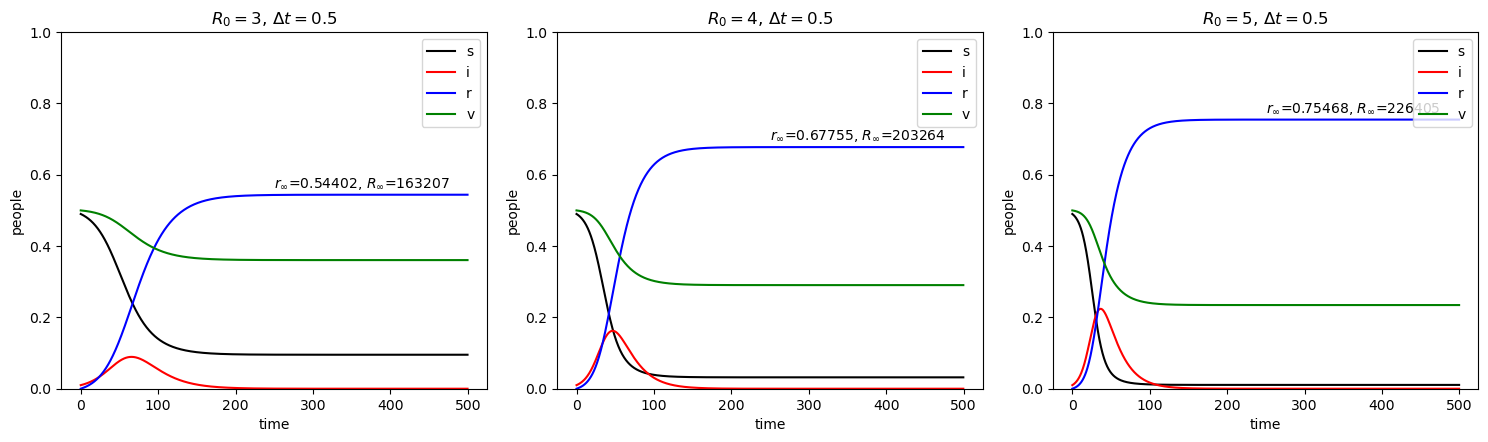

In [10]:

dt = .5  # time step
t_max = .5*1000  # maximum time

N = 300000

# parameters
i_0 = 0.01  # initial infection
r_0 = 0
v_0 = .5
s_0 = 1 - v_0 - i_0 - r_0 

# coefficients, as arrays so we can loop over values
gamma = 1/14 # typical infection length is 14 days and we know infection length = 1/gamma
VE = 0.8

R_0s = [3,4,5]

IC = [s_0, i_0, r_0, v_0]  # initial conditions

#initialize the plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))

# loop over the beta and gamma coefficient values
for x in range(3):
    R_0 = R_0s[x]
    beta = R_0 * gamma
    coeffs = [beta, gamma, VE]
    # define ts from 0 - t_max with dt time step.
    ts = np.arange(0, t_max, dt)  # create the time array between 0 - t_max

    # solve the SIR system of eqns with our forward Euler function above
    s, i, r, v, t = forwardEulerLeaky(IC, ts, coeffs)


    # plot
    # plot the forward euler solution
    ax[x].plot(t, s, 'k', t, i, 'r', t, r, 'b', t, v, 'g')
    # plot the analytical solution
    ax[x].legend(["s", "i", "r", "v"],loc='upper right')
    ax[x].annotate(r'$r_\infty$={:.5f}, $R_\infty$={:.0f}'.format(float(r[-1]),
                                                                  float(r[-1]*N)), (250, r[-1]+.02))
    ax[x].set_xlabel('time')
    ax[x].set_ylabel('people')
    ax[x].set_ylim([0, 1])
    ax[x].set_title(r'$R_0 = {}$, $\Delta t = {}$'.format(R_0, dt))

#pad the figure
fig.tight_layout(pad=1.0)
#save the figure
plt.savefig('my_leaky.png')


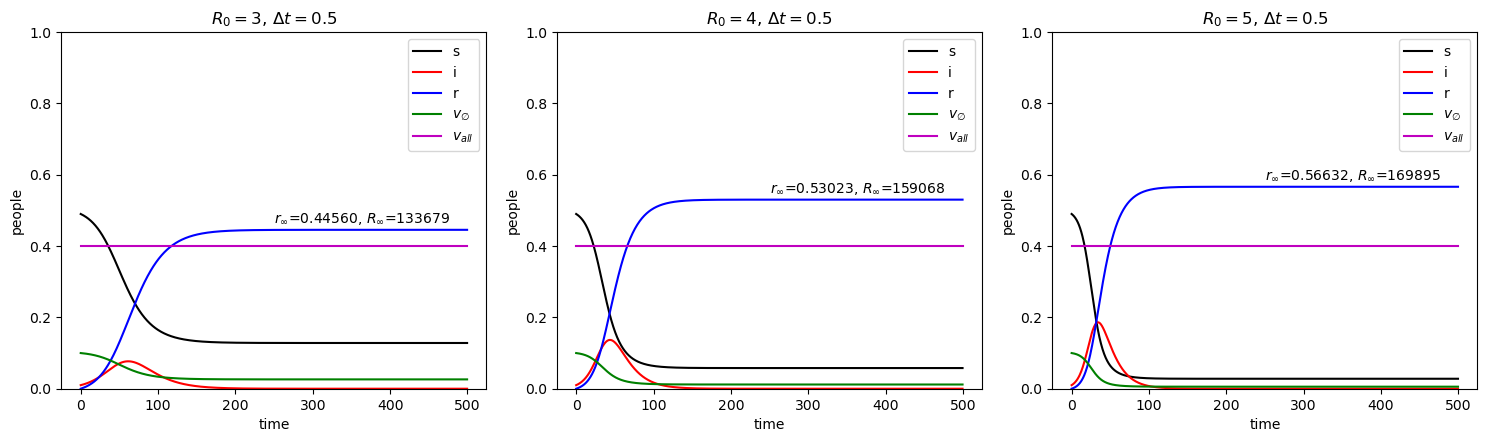

In [11]:

dt = .5  # time step
t_max = .5*1000  # maximum time

N = 300000

# parameters
i_0 = .01  # initial infection
r_0 = 0
v_no_0 = 0.5*.2
v_all_0 = 0.5*.8 # fully protected people
s_0 = 1 - i_0 - v_no_0 - v_all_0  - r_0 # initial susceptible


# coefficients, as arrays so we can loop over values
gamma = 1/14 # typical infection length is 14 days and we know infection length = 1/gamma
VE = 0.8

R_0s = [3,4,5]

IC = [s_0, i_0, r_0, v_no_0, v_all_0]  # initial conditions

#initialize the plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))

# loop over the beta and gamma coefficient values
for x in range(3):
    R_0 = R_0s[x]
    beta = R_0 * gamma
    coeffs = [beta, gamma]
    # define ts from 0 - t_max with dt time step.
    ts = np.arange(0, t_max, dt)  # create the time array between 0 - t_max

    # solve the SIR system of eqns with our forward Euler function above
    s, i, r, v_no, v_all, t = forwardEulerANM(IC, ts, coeffs)


    # plot
    # plot the forward euler solution
    ax[x].plot(t, s, 'k', t, i, 'r', t, r, 'b', t, v_no, 'g', t, v_all, 'm')
    # plot the analytical solution
    ax[x].legend(["s", "i", "r", r'$v_\varnothing$', r'$v_{all}$'], loc='upper right')
    ax[x].annotate(r'$r_\infty$={:.5f}, $R_\infty$={:.0f}'.format(float(r[-1]),
                                                                               float(r[-1]*N)), (250, r[-1]+.02))
    ax[x].set_xlabel('time')
    ax[x].set_ylabel('people')
    ax[x].set_ylim([0, 1])
    ax[x].set_title(r'$R_0 = {}$, $\Delta t = {}$'.format(R_0, dt))

#pad the figure
fig.tight_layout(pad=1.0)
#save the figure
plt.savefig('my_anm.png')
